# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_data_request = requests.get(btc_url).json()
btc_price = btc_data_request['data']['1']['quotes']['USD']['price']
btc_price

50840.0

In [6]:
# Fetch current ETH price
eth_data_request = requests.get(eth_url).json()
eth_price = eth_data_request['data']['1027']['quotes']['USD']['price']
eth_price

2349.02

In [7]:
# Compute current value of my crypto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

In [8]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $61008.00
The current value of your 5.3 ETH is $12449.81


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca_api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v3")
alpaca_api

In [11]:
# Format current date as ISO format
current_date = pd.Timestamp("2021-04-21", tz="America/New_York").isoformat()
current_date

'2021-04-21T00:00:00-04:00'

In [12]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
data = alpaca_api.get_barset(
    tickers,
    timeframe,
    start = current_date,
    end = current_date
).df

# Preview DataFrame
data

AGG                                      SPY  \
                            open    high     low   close   volume    open   
time                                                                        
2021-04-21 00:00:00-04:00  114.6  114.74  114.53  114.74  5250384  411.51   

                                                             
                             high     low   close    volume  
time                                                         
2021-04-21 00:00:00-04:00  416.29  411.36  416.08  54772634

In [13]:
# Pick AGG and SPY close prices
agg_close_price = data["AGG"]["close"][0]
spy_close_price = data["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.74
Current SPY closing price: $416.08


In [14]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $22948.00
The current value of your 50 SPY shares is $20804.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame(
    [
        [my_btc_value + my_eth_value],
        [my_spy_value + my_agg_value]
    ],
    index = ["Crypto Value", "Stock Value"],
    columns = ["amount"]
)

# Display savings DataFrame
display(df_savings)

,amount
Crypto Value,73457.806
Stock Value,43752.000


<AxesSubplot:ylabel='amount'>

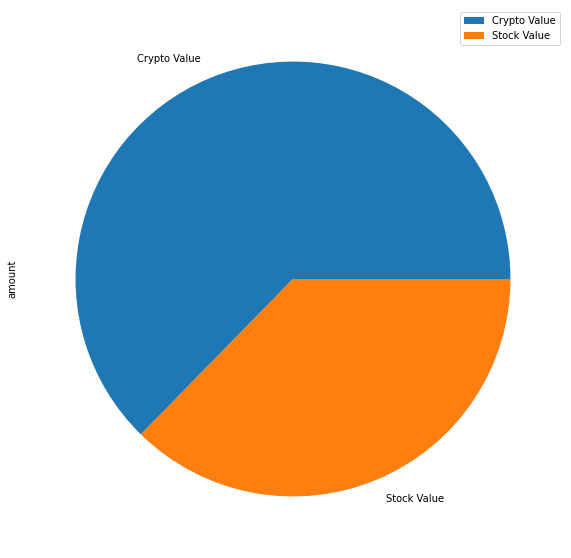

In [16]:
# Plot savings pie chart
df_savings.plot(kind = "pie", y = "amount", figsize = (10,10))

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["amount"]["Crypto Value"] + df_savings["amount"]["Stock Value"]

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in this fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal.")
else:
    print(f"You are ${(emergency_fund-total_savings):0.2f} away from reaching your financial goal.")

Congratulations! You have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-04-21', tz='America/New_York').isoformat()
end_date = current_date

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca_api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open     high     low    close   volume    open   
time                                                                           
2020-11-25 00:00:00-05:00  118.15  118.210  118.02  118.080  3739909  363.13   
2020-11-27 00:00:00-05:00  118.25  118.285  118.22  118.270  4646812  363.84   
2020-11-30 00:00:00-05:00  118.32  118.450  118.25  118.400  5231566  362.83   
2020-12-01 00:00:00-05:00  118.03  118.100  117.73  117.840  4308362  365.57   
2020-12-02 00:00:00-05:00  117.81  117.810  117.54  117.705  5554915  364.82   

                                                               
                             high     low     close    volume  
time                                                           
2020-11-25 00:00:00-05:00  363.16  361.48  362.6500  35309156  
2020-11-27 00:00:00-05:00  364.18  362.58  363.6500  46840189  
2020-11-30 00:00:00-05:00  363.12  359.17  362.0000  67154075  
2020-12-01 00:00:00-05:00  367.68  364.93  365.9700  64527332  
2020-12-02 00:00:00-05:00  366.96  364.20  366.7599  37323404

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
monte_carlo_sim = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    weights = [.40,.60],
    num_trading_days = 252*30
)

In [21]:
# Printing the simulation input data
monte_carlo_sim.portfolio_data.head()

AGG                                     \
                             open     high     low    close   volume   
time                                                                   
2020-11-25 00:00:00-05:00  118.15  118.210  118.02  118.080  3739909   
2020-11-27 00:00:00-05:00  118.25  118.285  118.22  118.270  4646812   
2020-11-30 00:00:00-05:00  118.32  118.450  118.25  118.400  5231566   
2020-12-01 00:00:00-05:00  118.03  118.100  117.73  117.840  4308362   
2020-12-02 00:00:00-05:00  117.81  117.810  117.54  117.705  5554915   

                                           SPY                            \
                          daily_return    open    high     low     close   
time                                                                       
2020-11-25 00:00:00-05:00          NaN  363.13  363.16  361.48  362.6500   
2020-11-27 00:00:00-05:00     0.001609  363.84  364.18  362.58  363.6500   
2020-11-30 00:00:00-05:00     0.001099  362.83  363.12  359.17  362.0000   
2020-12-01 00:00:00-05:00    -0.004730  365.57  367.68  364.93  365.9700   
2020-12-02 00:00:00-05:00    -0.001146  364.82  366.96  364.20  366.7599   

                                                  
                             volume daily_return  
time                                              
2020-11-25 00:00:00-05:00  35309156          NaN  
2020-11-27 00:00:00-05:00  46840189     0.002757  
2020-11-30 00:00:00-05:00  67154075    -0.004537  
2020-12-01 00:00:00-05:00  64527332     0.010967  
2020-12-02 00:00:00-05:00  37323404     0.002158

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
monte_carlo_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002344,1.001190,1.006677,1.009381,1.005476,0.997783,1.006886,1.002719,1.009680,1.002816,...,1.003574,1.004967,1.005476,1.001010,1.005223,0.994175,0.990047,1.012914,1.002379,0.999683
2,1.003861,1.000637,1.016896,1.002789,1.019479,1.006925,1.006141,1.003020,1.003412,0.998473,...,0.998075,0.998376,1.009492,0.998968,1.005478,0.993313,0.992222,1.008057,1.006419,1.000125
3,0.999175,1.007881,1.020498,1.012597,1.020670,1.011703,1.004384,1.000978,1.000691,1.004010,...,0.991728,1.001564,1.008293,0.999103,1.004746,0.986459,1.002410,1.008917,1.004043,0.998667
4,0.997305,1.002129,1.027338,1.018732,1.022939,1.007585,1.005256,0.995492,1.001956,1.001797,...,0.991500,0.993388,1.007354,0.991558,1.000610,0.990433,1.007962,1.013749,1.005191,0.994209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,324.327069,259.093914,117.247657,366.608896,235.069793,144.881475,237.586855,101.722762,355.764913,273.303883,...,232.481022,432.588148,505.567159,143.803510,446.882594,390.897329,510.635747,462.137949,273.038080,138.514494
7557,324.914174,259.276787,117.149710,365.978017,235.331629,145.722629,240.021727,101.858021,353.410180,272.018302,...,231.567601,431.018995,505.711248,143.967491,447.240897,392.969594,511.185820,463.834305,274.306145,138.544329
7558,326.301537,262.861068,118.257432,364.705979,234.665263,145.572049,241.397843,101.905388,354.305920,270.592048,...,231.529424,430.219225,507.862245,143.244463,446.750468,394.188783,512.703826,459.787927,274.695205,138.210577
7559,326.964199,264.859631,116.846879,369.669813,233.166568,147.890185,243.169225,102.107002,353.071615,272.030499,...,231.823005,432.032533,512.784667,143.376777,448.186651,397.910189,514.705780,460.984221,273.945050,138.971334


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

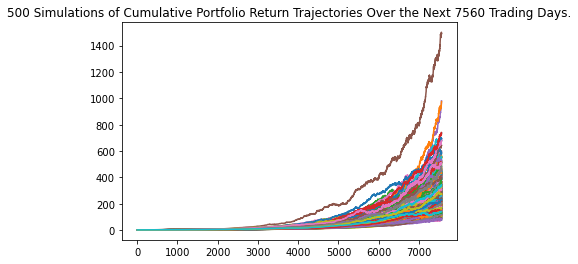

In [23]:
# Plot simulation outcomes
monte_carlo_sim.plot_simulation()

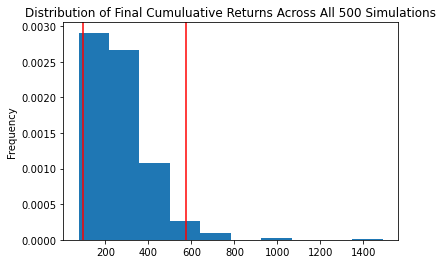

In [24]:
# Plot probability distribution and confidence intervals
dist_plot = monte_carlo_sim.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = monte_carlo_sim.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count            500.000000
mean             270.264842
std              140.946679
min               74.765175
25%              175.045319
50%              240.871016
75%              327.684178
max             1490.534694
95% CI Lower      97.339773
95% CI Upper     575.452060
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8] * initial_investment, 2)
ci_upper = round(summary_stats[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1946795.46 and $11509041.2


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [40]:
# Set initial investment
initial_investment_2 = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_2 = round(summary_stats[8] * initial_investment_2, 2)
ci_upper_2 = round(summary_stats[9] * initial_investment_2, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_2} and ${ci_upper_2}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within in the range of $2920193.18 and $17263561.8


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
monte_carlo_sim_5 = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    weights = [.40,.60],
    num_trading_days = 252*5
)
monte_carlo_sim_5.portfolio_data.head()

AGG                                     \
                             open     high     low    close   volume   
time                                                                   
2020-11-25 00:00:00-05:00  118.15  118.210  118.02  118.080  3739909   
2020-11-27 00:00:00-05:00  118.25  118.285  118.22  118.270  4646812   
2020-11-30 00:00:00-05:00  118.32  118.450  118.25  118.400  5231566   
2020-12-01 00:00:00-05:00  118.03  118.100  117.73  117.840  4308362   
2020-12-02 00:00:00-05:00  117.81  117.810  117.54  117.705  5554915   

                                           SPY                            \
                          daily_return    open    high     low     close   
time                                                                       
2020-11-25 00:00:00-05:00          NaN  363.13  363.16  361.48  362.6500   
2020-11-27 00:00:00-05:00     0.001609  363.84  364.18  362.58  363.6500   
2020-11-30 00:00:00-05:00     0.001099  362.83  363.12  359.17  362.0000   
2020-12-01 00:00:00-05:00    -0.004730  365.57  367.68  364.93  365.9700   
2020-12-02 00:00:00-05:00    -0.001146  364.82  366.96  364.20  366.7599   

                                                  
                             volume daily_return  
time                                              
2020-11-25 00:00:00-05:00  35309156          NaN  
2020-11-27 00:00:00-05:00  46840189     0.002757  
2020-11-30 00:00:00-05:00  67154075    -0.004537  
2020-12-01 00:00:00-05:00  64527332     0.010967  
2020-12-02 00:00:00-05:00  37323404     0.002158

In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
monte_carlo_sim_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005098,0.998755,0.997789,0.997081,1.002926,1.002888,0.995807,1.004657,0.995611,1.005873,...,1.001254,0.996705,0.999323,0.998030,0.994376,1.011698,1.000515,1.006782,0.994762,0.997430
2,1.013496,0.998344,0.993464,0.991838,1.003685,0.997923,1.005406,1.009380,0.988039,1.009467,...,0.996678,0.992752,1.004708,0.989212,0.993573,1.006123,1.000691,1.003886,0.995458,0.999160
3,1.024361,1.011088,0.986361,0.998073,1.001163,0.987519,0.996628,1.016517,0.994560,1.010208,...,0.993236,0.990817,1.003437,0.976252,0.993527,1.004106,1.003752,1.004601,1.000503,1.006475
4,1.020764,1.010642,0.986546,0.998334,0.991927,0.990197,0.990575,1.017808,0.997266,1.006735,...,0.990122,0.998743,1.003947,0.973470,1.000266,1.005438,1.009702,1.011362,0.999494,1.013338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.147954,2.060496,2.426078,2.524441,2.869760,3.762343,2.415016,2.880099,2.573798,2.362460,...,2.487675,3.123587,3.339902,2.682054,3.289482,2.198465,2.414992,2.802365,2.234995,2.527150
1257,2.153199,2.060207,2.409000,2.505836,2.881890,3.786630,2.425281,2.884088,2.563553,2.368078,...,2.503128,3.110754,3.317495,2.667898,3.293724,2.190570,2.422259,2.810047,2.233937,2.512817
1258,2.151030,2.034822,2.402021,2.497112,2.892721,3.800836,2.407059,2.886366,2.570437,2.367485,...,2.514981,3.125281,3.317461,2.661990,3.302779,2.209364,2.419391,2.818382,2.221358,2.518797
1259,2.159225,2.021085,2.385780,2.515975,2.859684,3.787404,2.429120,2.904534,2.587894,2.382805,...,2.506628,3.142227,3.324304,2.659585,3.333644,2.207623,2.411433,2.834038,2.237068,2.528749


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

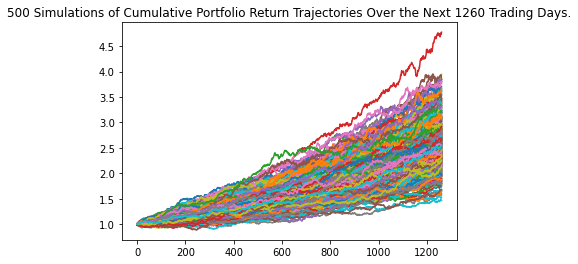

In [30]:
# Plot simulation outcomes
monte_carlo_sim_5.plot_simulation()

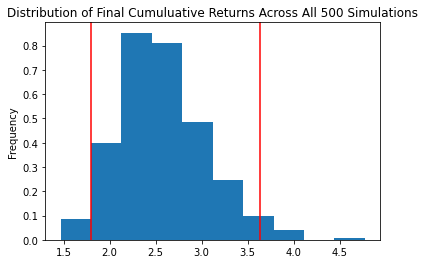

In [31]:
# Plot probability distribution and confidence intervals
dist_plot_5 = monte_carlo_sim_5.plot_distribution()

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_5 = monte_carlo_sim_5.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_5)

count           500.000000
mean              2.572623
std               0.473631
min               1.466968
25%               2.250714
50%               2.540265
75%               2.844087
max               4.772222
95% CI Lower      1.793853
95% CI Upper      3.628263
Name: 1260, dtype: float64


In [33]:
# Set initial investment
initial_investment_5 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_stats_5[8]*60000,2)
ci_upper_five = round(summary_stats_5[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $107631.21 and $217695.79


### Ten Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
monte_carlo_sim_10 = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    weights = [.40,.60],
    num_trading_days = 252*10
)
monte_carlo_sim_10.portfolio_data.head()

AGG                                     \
                             open     high     low    close   volume   
time                                                                   
2020-11-25 00:00:00-05:00  118.15  118.210  118.02  118.080  3739909   
2020-11-27 00:00:00-05:00  118.25  118.285  118.22  118.270  4646812   
2020-11-30 00:00:00-05:00  118.32  118.450  118.25  118.400  5231566   
2020-12-01 00:00:00-05:00  118.03  118.100  117.73  117.840  4308362   
2020-12-02 00:00:00-05:00  117.81  117.810  117.54  117.705  5554915   

                                           SPY                            \
                          daily_return    open    high     low     close   
time                                                                       
2020-11-25 00:00:00-05:00          NaN  363.13  363.16  361.48  362.6500   
2020-11-27 00:00:00-05:00     0.001609  363.84  364.18  362.58  363.6500   
2020-11-30 00:00:00-05:00     0.001099  362.83  363.12  359.17  362.0000   
2020-12-01 00:00:00-05:00    -0.004730  365.57  367.68  364.93  365.9700   
2020-12-02 00:00:00-05:00    -0.001146  364.82  366.96  364.20  366.7599   

                                                  
                             volume daily_return  
time                                              
2020-11-25 00:00:00-05:00  35309156          NaN  
2020-11-27 00:00:00-05:00  46840189     0.002757  
2020-11-30 00:00:00-05:00  67154075    -0.004537  
2020-12-01 00:00:00-05:00  64527332     0.010967  
2020-12-02 00:00:00-05:00  37323404     0.002158

In [35]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
monte_carlo_sim_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995514,0.995489,0.998842,0.994036,0.999094,1.001602,1.005198,1.004189,0.997626,1.000362,...,1.006919,1.002994,0.989110,0.998007,0.996460,1.002756,0.994608,1.001153,1.009736,0.997711
2,0.996731,0.994248,0.999368,0.994779,0.993382,1.001270,1.002774,1.003786,0.992432,0.993388,...,1.000911,1.006805,0.995610,0.999670,0.998419,1.007713,0.998924,0.993963,1.011057,1.009398
3,1.007197,1.003432,1.005001,0.990219,0.986031,1.002159,1.007032,1.002172,0.991183,0.987766,...,1.012566,1.006576,0.988292,0.997141,0.999416,1.019688,0.999944,0.995182,1.009191,1.017390
4,1.003612,1.010298,0.999325,0.989112,0.980808,1.004819,0.995512,1.012999,0.997256,0.986998,...,1.005912,1.010609,0.988829,0.991822,1.002798,1.023285,1.002539,0.997124,1.015440,1.027750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.725520,4.577993,10.961881,5.179792,5.116382,7.752914,8.501946,4.590614,7.650066,4.214984,...,5.311691,5.185569,4.101635,6.881396,6.338000,9.129382,5.357605,9.850303,5.472647,8.877857
2517,5.803939,4.572352,11.058210,5.224157,5.161930,7.808643,8.509896,4.587735,7.603936,4.206667,...,5.325712,5.225015,4.121786,6.879634,6.318593,9.172568,5.358626,9.862668,5.452065,8.897311
2518,5.820133,4.580566,11.100372,5.196456,5.124023,7.855421,8.492967,4.638464,7.548175,4.207298,...,5.364065,5.245051,4.129912,6.884260,6.359539,9.108044,5.369853,9.881360,5.445469,8.827291
2519,5.796662,4.588766,11.154043,5.204813,5.134242,7.789628,8.558031,4.670887,7.508902,4.238412,...,5.325843,5.225366,4.133743,6.930630,6.355894,9.053290,5.423635,9.923332,5.489021,8.869530


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

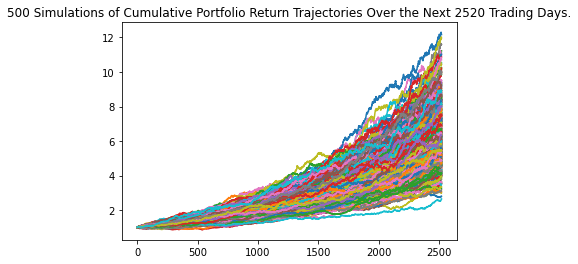

In [36]:
# Plot simulation outcomes
monte_carlo_sim_10.plot_simulation()

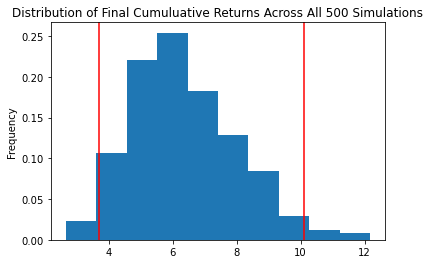

In [37]:
# Plot probability distribution and confidence intervals
dist_plot_10 = monte_carlo_sim_10.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_10 = monte_carlo_sim_10.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_10)

count           500.000000
mean              6.352127
std               1.663973
min               2.651146
25%               5.151222
50%               6.128557
75%               7.412559
max              12.171650
95% CI Lower      3.702607
95% CI Upper     10.094865
Name: 2520, dtype: float64


In [39]:
# Set initial investment
initial_investment_10 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_stats_10[8]*60000,2)
ci_upper_ten = round(summary_stats_10[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $222156.4 and $605691.91
